# 5 Modeling

### 5.1 Import Modules and Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pickle

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

from sklearn.svm import SVR

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_absolute_error

import warnings
warnings.filterwarnings("ignore")

In [2]:
Train70 = open('../Step 4 - Pre-Processing/Train70Data.p','rb')
X_train70, y_train70 = pickle.load(Train70)
Train70.close()

Test30 = open('../Step 4 - Pre-Processing/Test30Data.p','rb')
X_test30, y_test30 = pickle.load(Test30)
Test30.close()

Train50 = open('../Step 4 - Pre-Processing/Train50Data.p','rb')
X_train50, y_train50 = pickle.load(Train50)
Train50.close()

Test50 = open('../Step 4 - Pre-Processing/Test50Data.p','rb')
X_test50, y_test50 = pickle.load(Test50)
Test50.close()

print(X_train70.shape, y_train70.shape)

(3101, 240) (3101, 1)


In [3]:
filename = '../Step 2 - Data Wrangling/predict-volcanic-eruptions/Data.csv'
df = pd.read_csv(filename)

X = df.drop(['segment_id','time_to_eruption'],axis =1 )
y = df[['time_to_eruption']]

## 5.2 Ridge Regression

In [4]:
ridReg = Ridge()
params = {'alpha' : [x/10 for x in range(0,11)], 'max_iter' : [10,20,50,75,100], 'fit_intercept' : [True,False]}
rSearchCV = RandomizedSearchCV(ridReg, params, cv=5, n_jobs = -1)

rSearchCV.fit(X_train70, y_train70)
y_predTest30 = rSearchCV.predict(X_test30)
MAEScore = mean_absolute_error(y_test30,y_predTest30)
print('A train test split of 70/30 had a best params of %s with a score of %.3f and a MAE : %.3f on the test data.\n' % (rSearchCV.best_params_, rSearchCV.best_score_,MAEScore))

rSearchCV.fit(X_train50, y_train50)
y_predTest50 = rSearchCV.predict(X_test50)
MAEScore = mean_absolute_error(y_test50,y_predTest50)
print('A train test split of 50/50 had a best params of %s with a score of %.3f and a MAE : %.3f on the test data.\n' % (rSearchCV.best_params_, rSearchCV.best_score_,MAEScore))

A train test split of 70/30 had a best params of {'max_iter': 20, 'fit_intercept': True, 'alpha': 1.0} with a score of -17.739 and a MAE : 14325960.817 on the test data.

A train test split of 50/50 had a best params of {'max_iter': 75, 'fit_intercept': False, 'alpha': 0.7} with a score of -0.441 and a MAE : 24087348.076 on the test data.



Using Ridge regression and randomized search CV, we receieved a minimum MAE of 0.749 with our 70/30 split data. This is a lower than the 50/50 split, which just gives us an extra indicator that our model isn't doing something wrong since feeding it more data should bring the MAE down.

## 5.3 Lasso Regression

In [5]:
lasReg = Lasso()
params = {'alpha' : [x/10 for x in range(0,11)], 'max_iter' : [10,20,50,75,100], 'fit_intercept' : [True,False]}
gSearchCV = RandomizedSearchCV(lasReg, params, cv=5, n_jobs = -1)

rSearchCV.fit(X_train70, y_train70)
y_predTest30 = rSearchCV.predict(X_test30)
MAEScore = mean_absolute_error(y_test30,y_predTest30)
print('A train test split of 70/30 had a best params of %s with a score of %.3f and a MAE : %.3f on the test data.\n' % (rSearchCV.best_params_, rSearchCV.best_score_,MAEScore))

rSearchCV.fit(X_train50, y_train50)
y_predTest50 = rSearchCV.predict(X_test50)
MAEScore = mean_absolute_error(y_test50,y_predTest50)
print('A train test split of 50/50 had a best params of %s with a score of %.3f and a MAE : %.3f on the test data.\n' % (rSearchCV.best_params_, rSearchCV.best_score_,MAEScore))

A train test split of 70/30 had a best params of {'max_iter': 20, 'fit_intercept': True, 'alpha': 1.0} with a score of -17.739 and a MAE : 14325960.817 on the test data.

A train test split of 50/50 had a best params of {'max_iter': 20, 'fit_intercept': True, 'alpha': 0.9} with a score of -0.435 and a MAE : 24020823.309 on the test data.



With Lasso regression, we get something very close to the Ridge regression. We may need to look at another model to help see if we can bring the MAE down lower.

## 5.4 SVR

In [6]:
svrModel = SVR()
params = {'degree' : [1,2,5,10,15,25,50,100], 'C' : [1,5,10,20,25,50,75,100],'epsilon' : [0.1,0.01,0.2,0.05,0.001]}
rSearchCV = RandomizedSearchCV(svrModel, params, cv=5, n_jobs = -1)

rSearchCV.fit(X_train70, y_train70)
y_predTest30 = rSearchCV.predict(X_test30)
MAEScore = mean_absolute_error(y_test30,y_predTest30)
print('A train test split of 70/30 had a best params of %s with a score of %.3f and a MAE : %.3f on the test data.\n' % (rSearchCV.best_params_, rSearchCV.best_score_,MAEScore))

rSearchCV.fit(X_train50, y_train50)
y_predTest50 = rSearchCV.predict(X_test50)
MAEScore = mean_absolute_error(y_test50,y_predTest50)
print('A train test split of 50/50 had a best params of %s with a score of %.3f and a MAE : %.3f on the test data.\n' % (rSearchCV.best_params_, rSearchCV.best_score_,MAEScore))

A train test split of 70/30 had a best params of {'epsilon': 0.001, 'degree': 2, 'C': 100} with a score of -0.003 and a MAE : 11482915.639 on the test data.

A train test split of 50/50 had a best params of {'epsilon': 0.1, 'degree': 50, 'C': 50} with a score of 0.566 and a MAE : 22830575.652 on the test data.



SVR gave us a MAE of 11482915.639 which is lower than the Ridge and Lasso regression. It seems like SVR may be our model but let's train the models on the entire dataset and then evaluate to see how it performs.

## 3.5 Conclusion

In [4]:
model1 = Ridge(max_iter = 20, fit_intercept = True, alpha = 1.0)
model1.fit(X_train70,y_train70)

y_pred = model1.predict(X_test30)
print('MAE : %.3f' % (mean_absolute_error(y_test30,y_pred)))

MAE : 14325960.817


In [5]:
model2 = Lasso(max_iter = 20, fit_intercept = True, alpha = 1.0)
model2.fit(X_train70,y_train70)

y_pred = model2.predict(X_test30)
print('MAE : %.3f' % (mean_absolute_error(y_test30,y_pred)))

MAE : 10249337.702


In [6]:
model3 = SVR(kernel = 'rbf', epsilon = 0.001, degree = 2, C = 100)
model3.fit(X_train70,y_train70)

y_pred = model3.predict(X_test30)
print('MAE : %.3f' % (mean_absolute_error(y_test30,y_pred)))

MAE : 11482915.639


|Model|Split Size|MAE|
|------|------|------|
|Ridge|70/30|14325960.817|
|Lasso|70/30|10249337.702|
|Support Vector|70/30|11482915.639|

Training models with the best parameters found from our randomized search showed that Lasso regression actually provided the lowest MAE. Lasso regression will be our final model. Although we can look at our coefficients from the ridge regression and see which columns had the most important features.

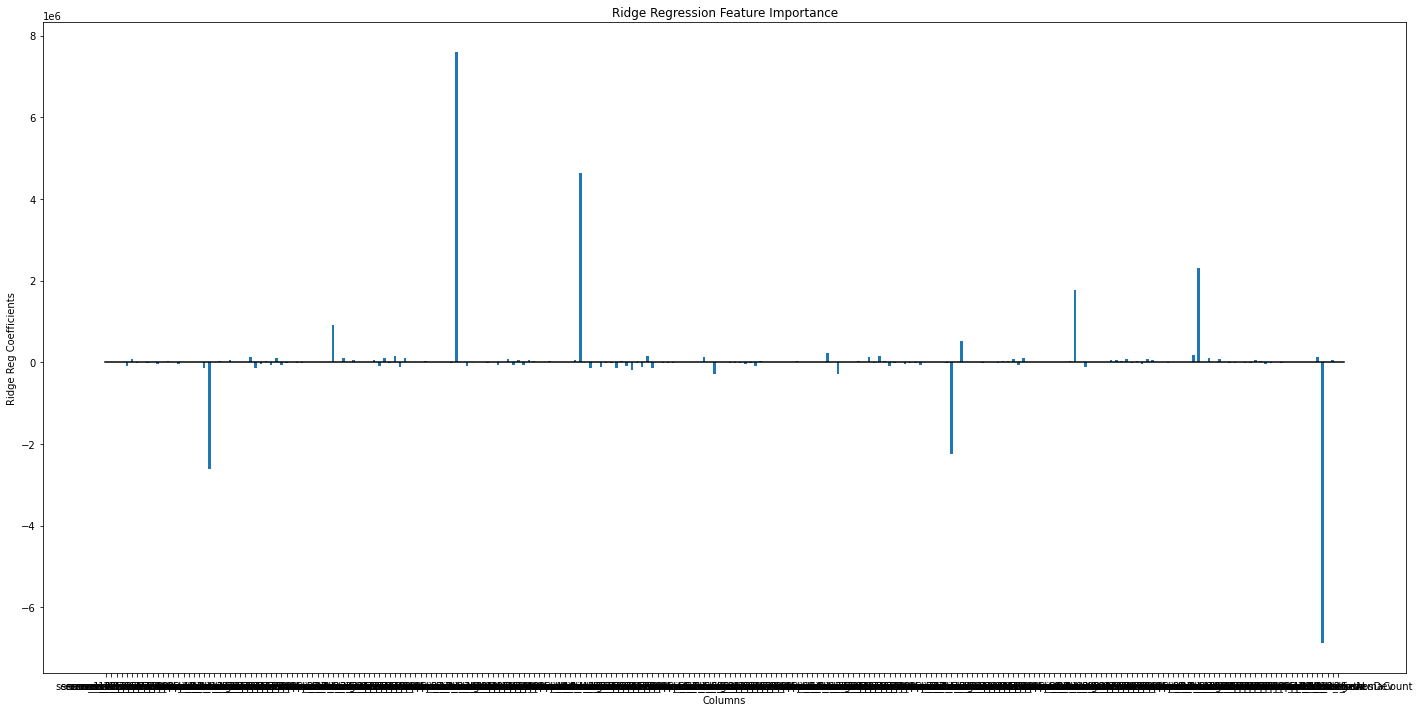

In [10]:
x = np.arange(1,len(X_train70.columns) + 1)

fig, ax = plt.subplots()
fig.set_figheight(10)
fig.set_figwidth(20)

plt.plot([0.75,241.25],[0,0], c = 'black')
plt.bar(x,model1.coef_[0],width = 0.5,tick_label = X_train70.columns)
plt.title('Ridge Regression Feature Importance')
plt.xlabel('Columns')
plt.ylabel('Ridge Reg Coefficients')

fig.tight_layout()
plt.show()

In [11]:
top10 = []
bottom10 = []
for i in range(0,10) :
    top10.append(sorted(zip(X_train70.columns,model1.coef_[0]), key = lambda x:x[1])[(-1 * i)-1])
    bottom10.append(sorted(zip(X_train70.columns,model1.coef_[0]), key = lambda x:x[1])[i])
    
print('The top 10 features based on Ridge regression :')
for i,j in top10 :
    print(i,j)

print('\nThe bottom 10 features based on Ridge regression :')
for i,j in bottom10 :
    print(i,j)

The top 10 features based on Ridge regression :
sensor_3_skew 7597768.635403201
sensor_4_skew 4634086.2185216835
sensor_9_skew 2316140.4313580506
sensor_8_skew 1774143.113459803
sensor_2_skew 920320.8150891468
sensor_7_meanAbsDev 520800.3887744317
sensor_6_skew 220151.9672663994
sensor_9_kurtosis 166979.0559612327
sensor_3_65percentile 160809.67068493055
sensor_7_35percentile 154206.05428656124

The bottom 10 features based on Ridge regression :
sensor_10_skew -6882123.786877783
sensor_1_skew -2606751.154321596
sensor_7_skew -2234386.9031546684
sensor_6_meanAbsDev -292912.404817837
sensor_5_meanAbsDev -276305.20183187944
sensor_5_35percentile -190055.02944175355
sensor_4_meanAbsDev -148853.60881495764
sensor_1_kurtosis -147939.7596082204
sensor_5_10percentile -143374.192196537
sensor_2_25percentile -143206.983521246


Looking at the coefficients of our Ridge regression, we see skew dominates the top 5 spots and holds 6 out of 10 spots in the largest 10 coefficients. It seems like the skew gives a very strong positive effect on our time to erupt. Looking at the bottom 10 features, 3 skew variables hold the top spots. It seems that the skew has the biggest impact on our target variable and can occur in both the positive and negative side. Other than skew, no other patterns seem to appear from the top spots in how certain features may affected the target. We will export the final model and provide it in a file to use.

In [9]:
finalModel = Lasso(max_iter = 20, fit_intercept = True, alpha = 1.0)
finalModel.fit(X,y)

finalModelExport = open('finalModel.p','wb')
pickle.dump(finalModel,finalModelExport)
finalModelExport.close()